In [114]:
import numpy as np
from scipy.optimize import minimize

In [116]:
T = np.array([1.0, 1.5, 2.0, 2.5, 3.0])
DF_d = np.array([0.9314462 , 0.91133852, 0.89326883, 0.87521559, 0.79683174])
DF_d_mkt = DF_d.copy()
x_mkt = np.log(DF_d_mkt)

n = len(T)

In [118]:
def smooth_objective(x, x_mkt, lam, mu):
    # fit to market
    fit = np.sum((x - x_mkt)**2)
    
    ## curvature penalty
    curvature = np.sum((x[2:] - 2*x[1:-1] + x[:-2])**2)
    
    # monotonicity penalty (penalize increases)
    mono_violation = np.sum(np.maximum(0, x[1:] - x[:-1])**2)
    
    return fit + lam * curvature + mu * mono_violation


In [120]:
lam = 10.0
mu = 1e06

result = minimize(smooth_objective, x0 = x_mkt, args = (x_mkt, lam, mu), method = 'L-BFGS-B')

x_smooth = result.x
DF_smooth = np.exp(x_smooth)

In [122]:
assert np.all(DF_smooth > 0)
assert np.all(np.diff(DF_smooth) <= 1e-8)

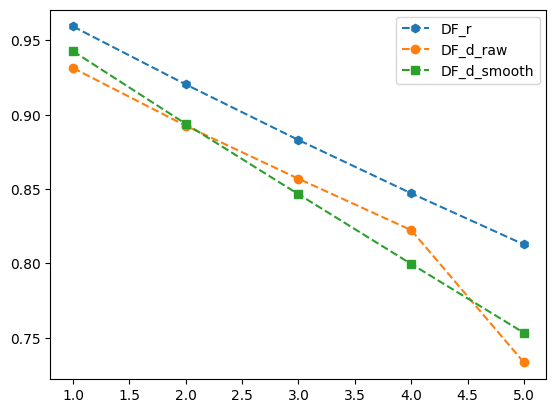

In [112]:
import matplotlib.pyplot as plt
DF_r = np.array([0.95938771, 0.92042478, 0.88304422, 0.84718177, 0.81277578])#np.array([0.95938771, 0.93970433, 0.92042478, 0.90154078, 0.88304422])

plt.plot(T, DF_r, 'h--', label = 'DF_r')
plt.plot(T, DF_d_mkt, 'o--', label = 'DF_d_raw')
plt.plot(T, DF_smooth, 's--', label = 'DF_d_smooth')
plt.legend()

In [91]:
S0 = 248.35
K_grid = np.array([240, 250, 260, 270, 300])
C_grid = np.array([35.53, 30.03, 24.75, 20.27, 16.47])
P_grid = np.array([19.73, 23.95, 28.85, 34.45, 41.25])
T = np.array([1, 2, 3, 4, 5])#np.array([1, 1.5, 2, 2.5, 3])

In [94]:
F_T = S0 * DF_r / DF_smooth
F_T

array([252.72923851, 255.71705523, 259.05272945, 263.10374242,
       267.93576568])

In [96]:
D_cum_smooth = S0 * (1/DF_smooth - 1/DF_r)
D_cum_smooth

array([ 4.5646181 ,  8.00397315, 12.12026443, 17.41508486, 24.09737859])

In [98]:
D_interval = np.diff(D_cum_smooth)
D_interval

array([3.43935505, 4.11629128, 5.29482043, 6.68229373])

In [100]:
fwd_div_smooth = (np.log(DF_smooth[:-1]) - np.log(DF_smooth[1:])) / np.diff(T)
fwd_div_smooth

array([0.05321287, 0.05442005, 0.05697679, 0.05965886])